In [92]:
import os
from os.path import join
import glob

# Directory containing results
results_dir = r"F:\insilico_exps\BigGAN_hyperparam_tune\resnet50_linf8"
import re
import pandas as pd
import pickle as pkl
# Define regex pattern to extract parameters
# pattern = r"Evol_results_BigGAN_(?P<gan_type>INet|EcoSet)(_sigma(?P<sigma>[\d\.]+))?_resnet50_linf8_(?P<layer>\w+)_ch(?P<channel>\d+)_rep(?P<rep>\d+)\.pkl"
pattern = r"Evol_results_(?P<gan_type>BigGAN_INet|BigGAN_EcoSet|DeePSim_FC6_INet)(_sigma(?P<sigma>[\d\.]+))?_resnet50_linf8_(?P<layer>\w+)_ch(?P<channel>\d+)_rep(?P<rep>\d+)\.pkl"

pkl_files = glob.glob(join(results_dir, "Evol_results_*.pkl"))
# Create empty lists to store parameters
params = []

# Extract parameters from each filename
for pkl_file in pkl_files:
    filename = os.path.basename(pkl_file)
    match = re.match(pattern, filename)
    if match:
        with open(pkl_file, 'rb') as f:
            data = pkl.load(f)
        best_img = data["best_imgs"][-1]
        last_gen_score = data['scores'][data['generations']==99]
        last_mean_score = last_gen_score.mean()
        param_dict = match.groupdict()
        param_dict['filename'] = filename
        param_dict['filepath'] = pkl_file
        # Convert numeric fields
        param_dict['sigma'] = float(param_dict['sigma']) if param_dict['sigma'] else 0.06  # default sigma
        param_dict['channel'] = int(param_dict['channel'])
        param_dict['rep'] = int(param_dict['rep'])
        param_dict['last_mean_score'] = last_mean_score
        param_dict['best_img'] = best_img
        params.append(param_dict)
    else:
        print(f"No match found for {filename}")

# Create pandas DataFrame
df = pd.DataFrame(params)
# Get all pkl files

In [93]:
# Get max score for each layer and unit
max_scores = df.groupby(["layer", "channel"])["last_mean_score"].transform("max")
# Normalize scores by dividing by max score for that layer/unit
df["normalized_score"] = df["last_mean_score"] / max_scores
# Group and aggregate the normalized scores
df.groupby(["layer", "gan_type", "sigma"]).agg({"normalized_score": "mean"})

normalized_score
layer  gan_type         sigma                  
fc     BigGAN_INet      0.01           0.231239
                        0.02           0.402812
                        0.04           0.483840
                        0.06           0.515615
                        0.08           0.627400
                        0.10           0.697510
                        0.20           0.750952
                        0.40           0.644897
                        0.80           0.425480
                        1.00           0.386754
                        2.00           0.274654
                        3.00           0.254568
       DeePSim_FC6_INet 3.00           0.894723
layer3 BigGAN_INet      0.01           0.170975
                        0.02           0.209838
                        0.04           0.231634
                        0.06           0.311088
                        0.08           0.344693
                        0.10           0.353316
                        0.20           0.372510
                        0.40           0.396020
                        0.80           0.264753
                        1.00           0.218571
                        2.00           0.037731
                        3.00           0.030552
       DeePSim_FC6_INet 3.00           0.945695
layer4 BigGAN_INet      0.01           0.220110
                        0.02           0.340403
                        0.04           0.387633
                        0.06           0.454508
                        0.08           0.492774
                        0.10           0.497660
                        0.20           0.517492
                        0.40           0.502647
                        0.80           0.322368
                        1.00           0.259600
                        2.00           0.075401
                        3.00           0.073862
       DeePSim_FC6_INet 3.00           0.933726

In [90]:
# Get max score for each layer and unit
max_scores = df.groupby(["layer", "channel"])["last_mean_score"].transform("max")
# Normalize scores by dividing by max score for that layer/unit
df["normalized_score"] = df["last_mean_score"] / max_scores
# Group and aggregate the normalized scores
df.groupby(["layer", "gan_type", "sigma"]).agg({"normalized_score": "mean"})

normalized_score
layer  gan_type         sigma                  
fc     BigGAN_INet      0.01           0.243393
                        0.02           0.426819
                        0.04           0.513626
                        0.06           0.548049
                        0.08           0.672266
                        0.10           0.744933
                        0.20           0.794923
                        0.40           0.684426
                        0.80           0.452797
                        1.00           0.412949
                        2.00           0.293573
                        3.00           0.272069
       DeePSim_FC6_INet 3.00           0.914666
layer3 BigGAN_INet      0.01           0.294307
                        0.02           0.362956
                        0.04           0.397950
                        0.06           0.551971
                        0.08           0.594456
                        0.10           0.609208
                        0.20           0.655076
                        0.40           0.703206
                        0.80           0.466382
                        1.00           0.391397
                        2.00           0.066225
                        3.00           0.053972
layer4 BigGAN_INet      0.01           0.271335
                        0.02           0.414322
                        0.04           0.463477
                        0.06           0.537684
                        0.08           0.588124
                        0.10           0.596149
                        0.20           0.630445
                        0.40           0.607198
                        0.80           0.393995
                        1.00           0.319134
                        2.00           0.094463
                        3.00           0.096086
       DeePSim_FC6_INet 3.00           1.000000

In [91]:
df.groupby(["layer", "gan_type", "sigma"]).agg({"last_mean_score": "mean"})#.reset_index()

last_mean_score
layer  gan_type         sigma                 
fc     BigGAN_INet      0.01          5.756355
                        0.02         10.331798
                        0.04         12.139289
                        0.06         12.766780
                        0.08         15.524478
                        0.10         17.364693
                        0.20         18.617796
                        0.40         15.597151
                        0.80         10.194633
                        1.00          9.200563
                        2.00          6.216905
                        3.00          5.659751
       DeePSim_FC6_INet 3.00         21.653378
layer3 BigGAN_INet      0.01          0.739279
                        0.02          0.918626
                        0.04          1.081473
                        0.06          1.429832
                        0.08          1.654904
                        0.10          1.715370
                        0.20          1.666023
                        0.40          1.768000
                        0.80          1.130523
                        1.00          0.933010
                        2.00          0.123570
                        3.00          0.106621
layer4 BigGAN_INet      0.01          5.430257
                        0.02          8.680178
                        0.04         10.717484
                        0.06         12.272639
                        0.08         12.600495
                        0.10         12.803867
                        0.20         13.206267
                        0.40         13.045877
                        0.80          8.157309
                        1.00          6.380495
                        2.00          1.835492
                        3.00          1.709825
       DeePSim_FC6_INet 3.00         27.103636

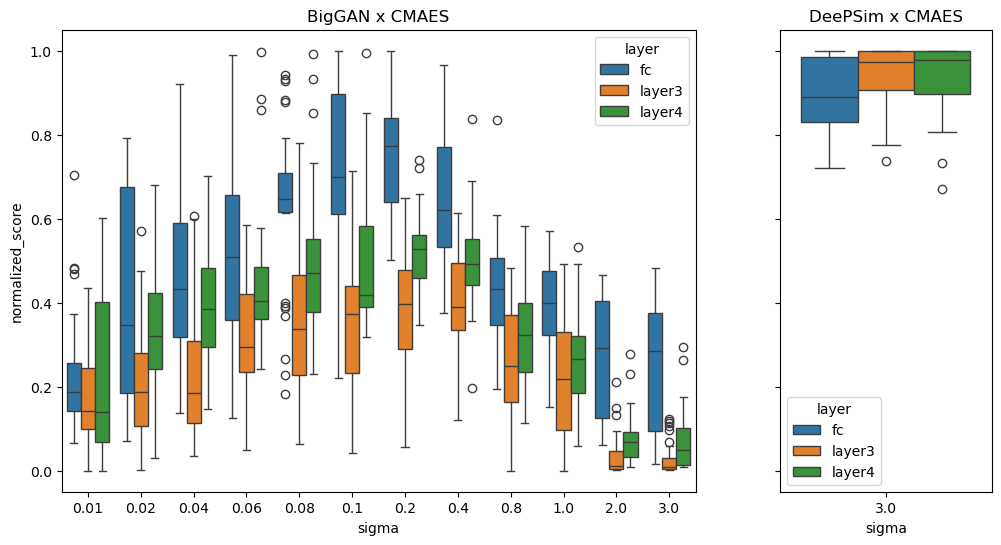

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2, figsize=(12, 6), sharey=True, gridspec_kw={'width_ratios': [3, 1]})
plt.sca(axes[0])
sns.boxplot(x='sigma', y='normalized_score', data=df.query("gan_type != 'DeePSim_FC6_INet'"), hue="layer")
plt.title("BigGAN x CMAES")
plt.sca(axes[1])
sns.boxplot(x='sigma', y='normalized_score', data=df.query("gan_type == 'DeePSim_FC6_INet'"), hue="layer")
plt.title("DeePSim x CMAES")
plt.show()

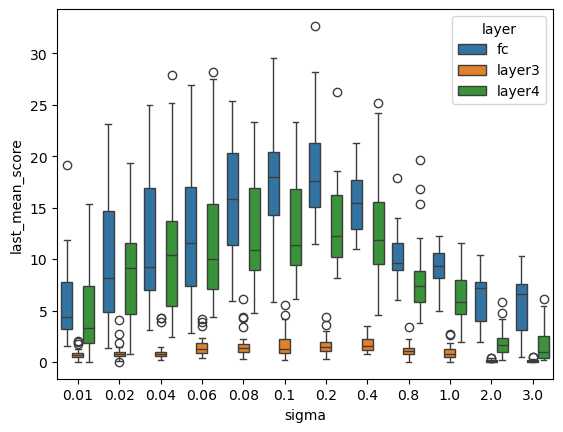

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='sigma', y='last_mean_score', data=df, hue="layer")
plt.show()

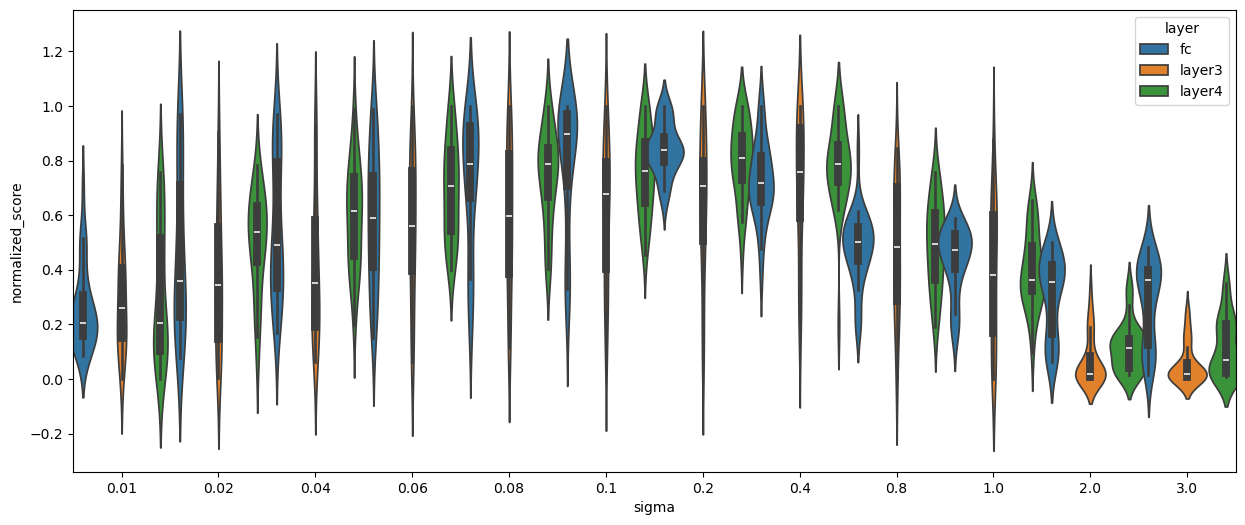

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.violinplot(x='sigma', y='normalized_score', data=df, hue="layer", width=1.2)
plt.show()

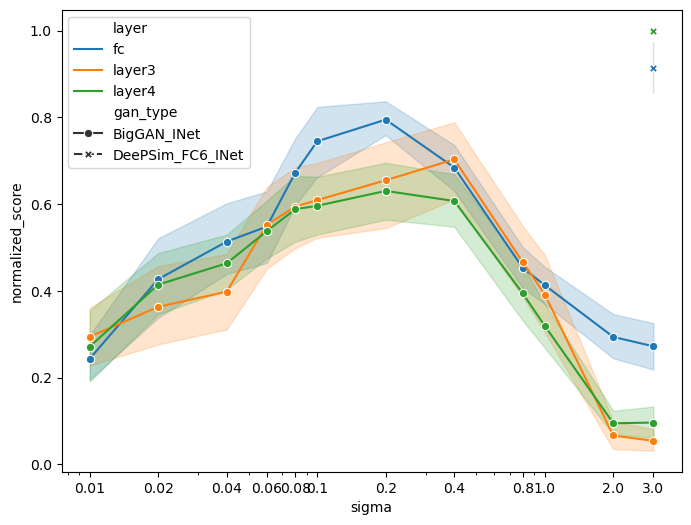

In [89]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='sigma', y='normalized_score', data=df, hue="layer", markers=True, style="gan_type")
plt.xscale("log")
plt.xticks([0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 3.0], 
           ['0.01', '0.02', '0.04', '0.06', '0.08', '0.1', '0.2', '0.4', '0.8', '1.0', '2.0', '3.0'])
plt.show()

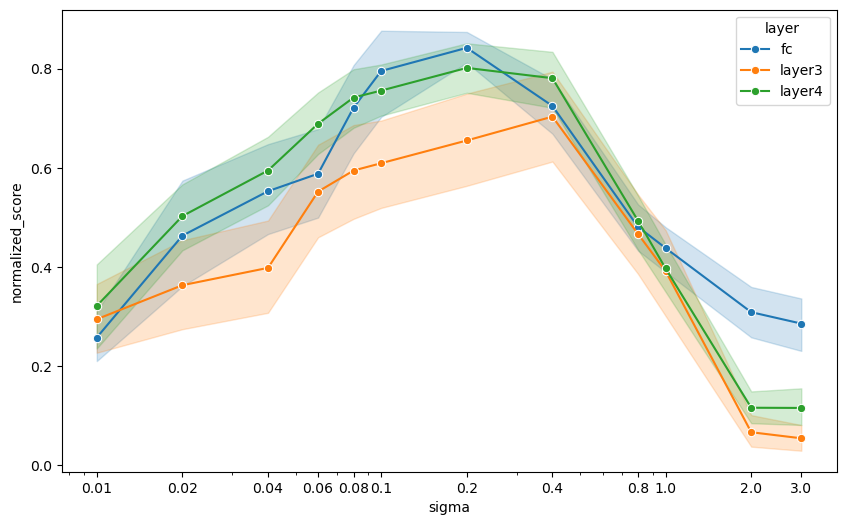

In [84]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='sigma', y='normalized_score', data=df, hue="layer", marker="o")
plt.xscale("log")
plt.xticks([0.01, 0.02, 0.04, 0.06, 0.08, 0.1, 0.2, 0.4, 0.8, 1.0, 2.0, 3.0], 
           ['0.01', '0.02', '0.04', '0.06', '0.08', '0.1', '0.2', '0.4', '0.8', '1.0', '2.0', '3.0'])
plt.show()

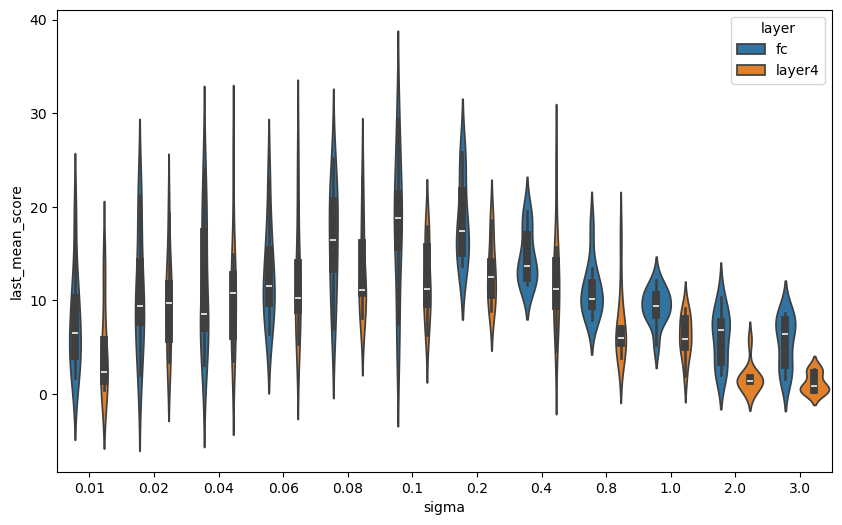

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(x='sigma', y='last_mean_score', data=df, hue="layer", width=1.2)
plt.show()

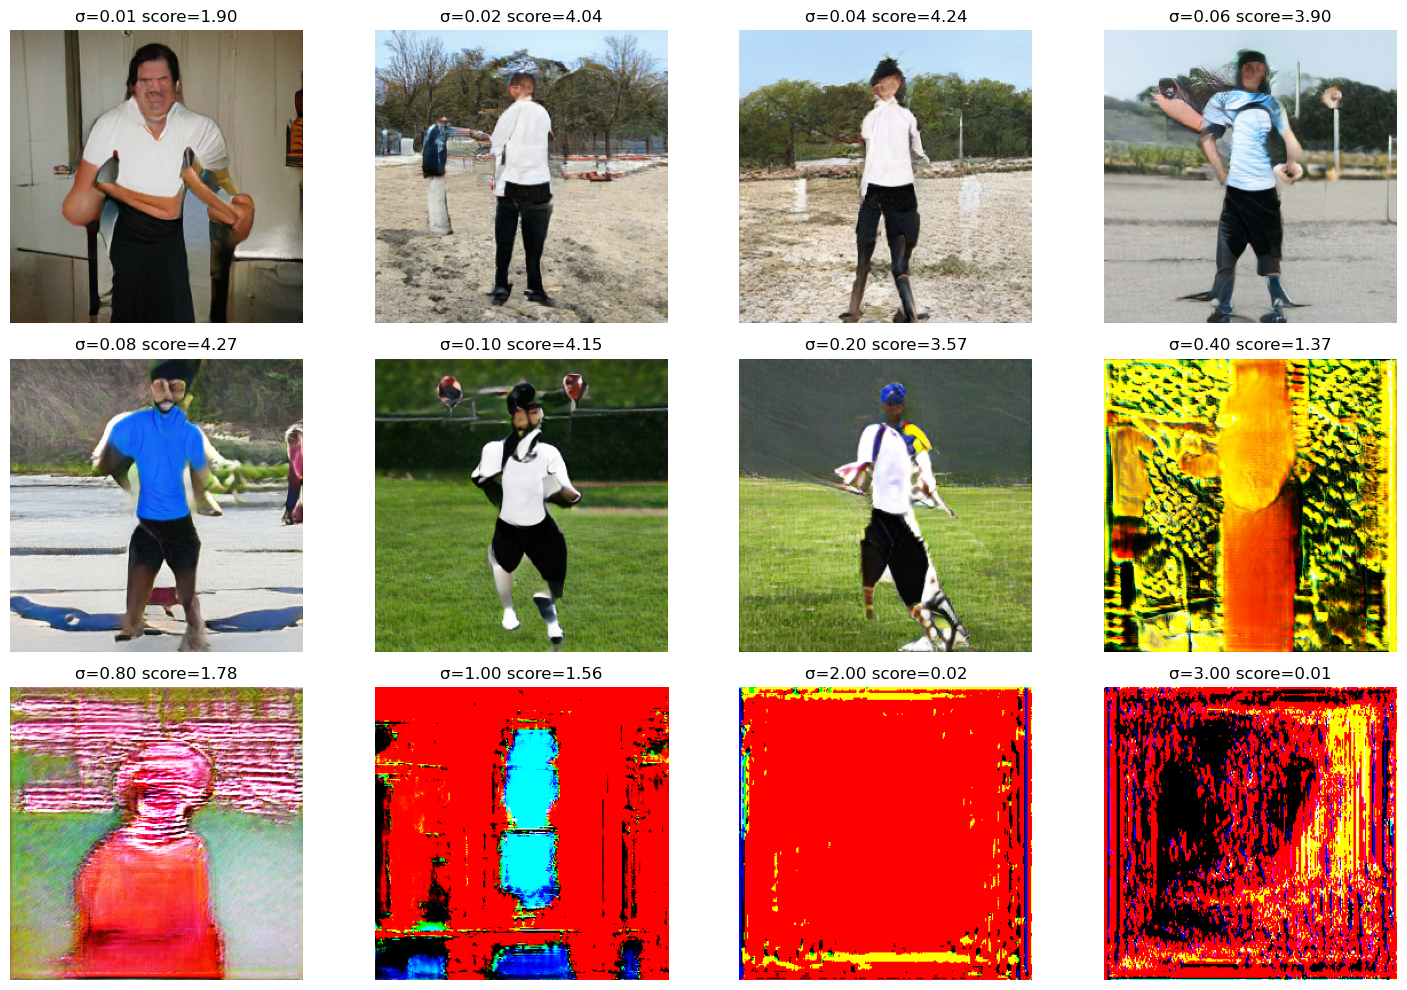

In [79]:
# find best image for one layer and unit and display them
df_subset = df.query("layer == 'layer3' and channel == 2 and rep == 1").sort_values(by="sigma", ascending=True)
best_imgs = df_subset.best_img.values


import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for i, img in enumerate(best_imgs):
    if i < len(axes):
        axes[i].imshow(img.permute(1,2,0).numpy())
        axes[i].axis('off')
        axes[i].set_title(f'σ={df_subset.iloc[i].sigma:.2f} score={df_subset.iloc[i].last_mean_score:.2f}')


plt.tight_layout()
plt.show()

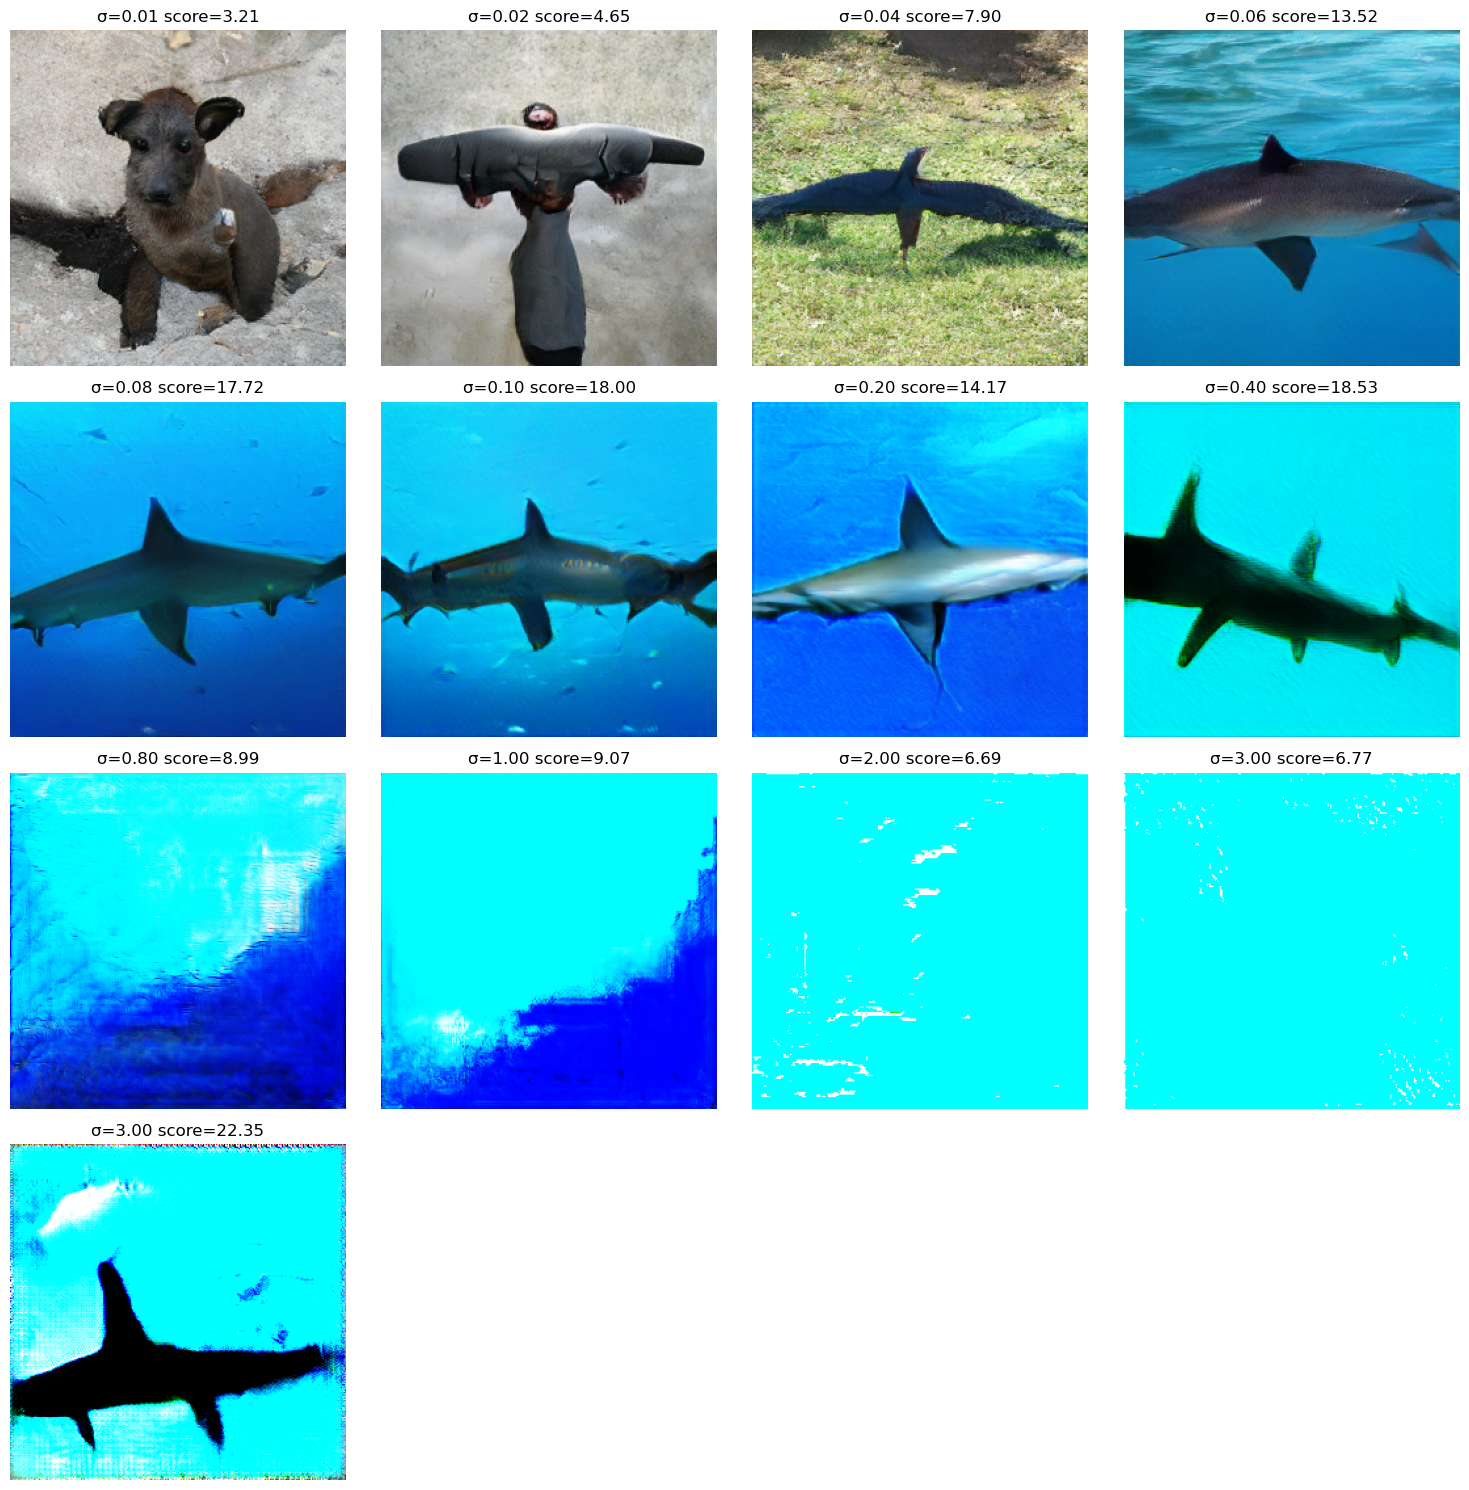

In [110]:
# find best image for one layer and unit and display them
df_subset = df.query("layer == 'fc' and channel == 4 and rep == 2").sort_values(by="sigma", ascending=True)
best_imgs = df_subset.best_img.values

import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
axes = axes.ravel()
for i, img in enumerate(best_imgs):
    if i < len(axes):
        axes[i].imshow(img.permute(1,2,0).numpy())
        axes[i].axis('off')
        axes[i].set_title(f'σ={df_subset.iloc[i].sigma:.2f} score={df_subset.iloc[i].last_mean_score:.2f}')
# remove the axes that are not used
for i in range(len(best_imgs), len(axes)):
    axes[i].remove()

plt.tight_layout()
plt.show()

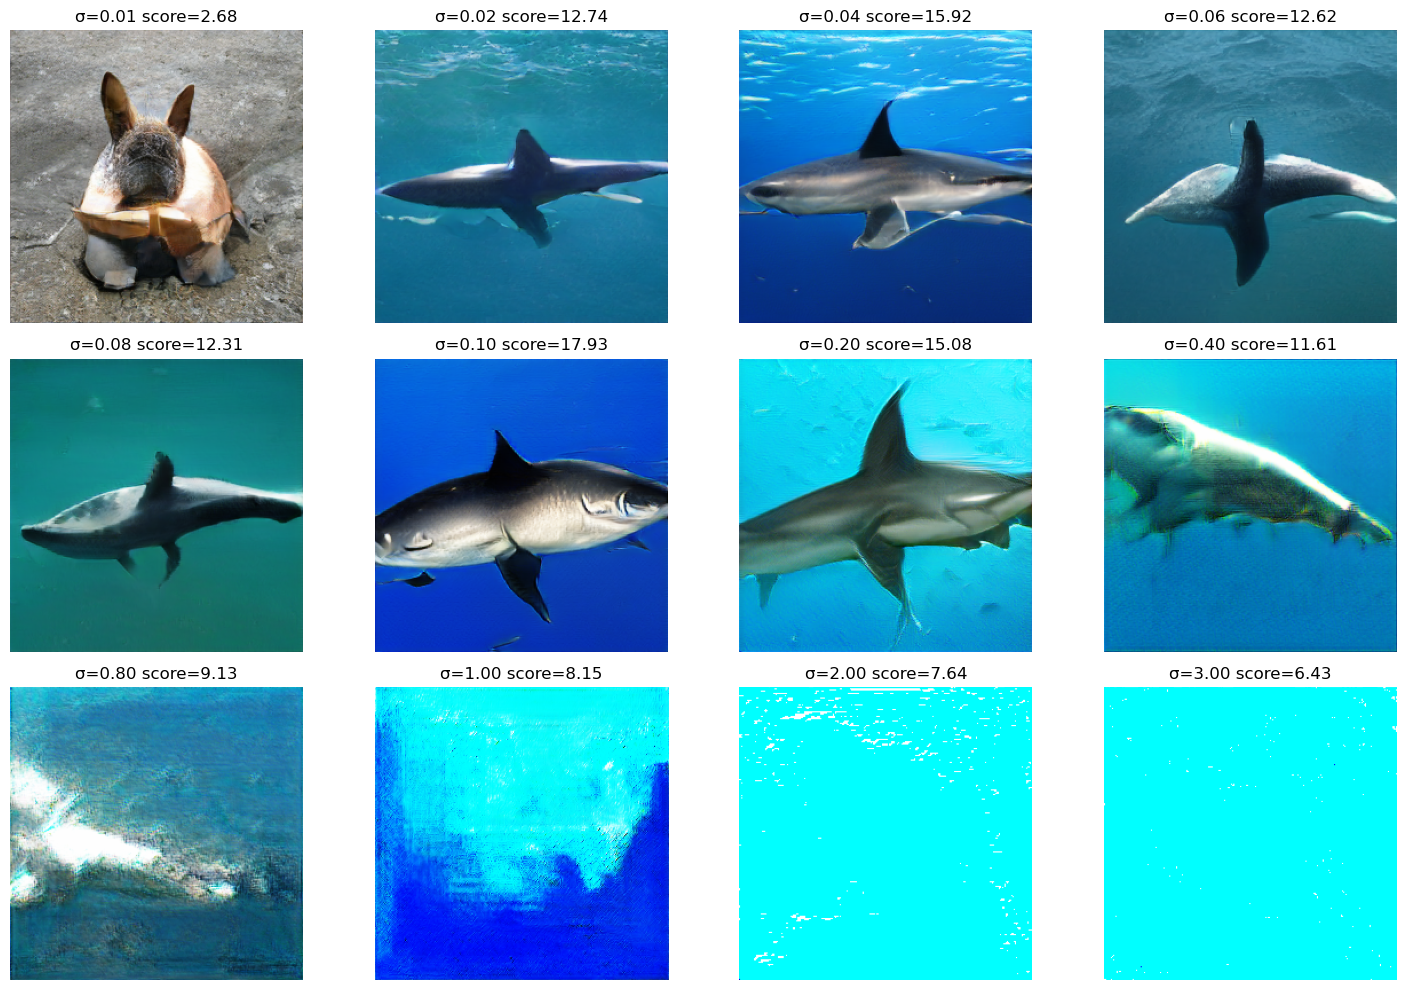

In [80]:
# find best image for one layer and unit and display them
df_subset = df.query("layer == 'fc' and channel == 2 and rep == 1").sort_values(by="sigma", ascending=True)
best_imgs = df_subset.best_img.values


import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for i, img in enumerate(best_imgs):
    if i < len(axes):
        axes[i].imshow(img.permute(1,2,0).numpy())
        axes[i].axis('off')
        axes[i].set_title(f'σ={df_subset.iloc[i].sigma:.2f} score={df_subset.iloc[i].last_mean_score:.2f}')


plt.tight_layout()
plt.show()

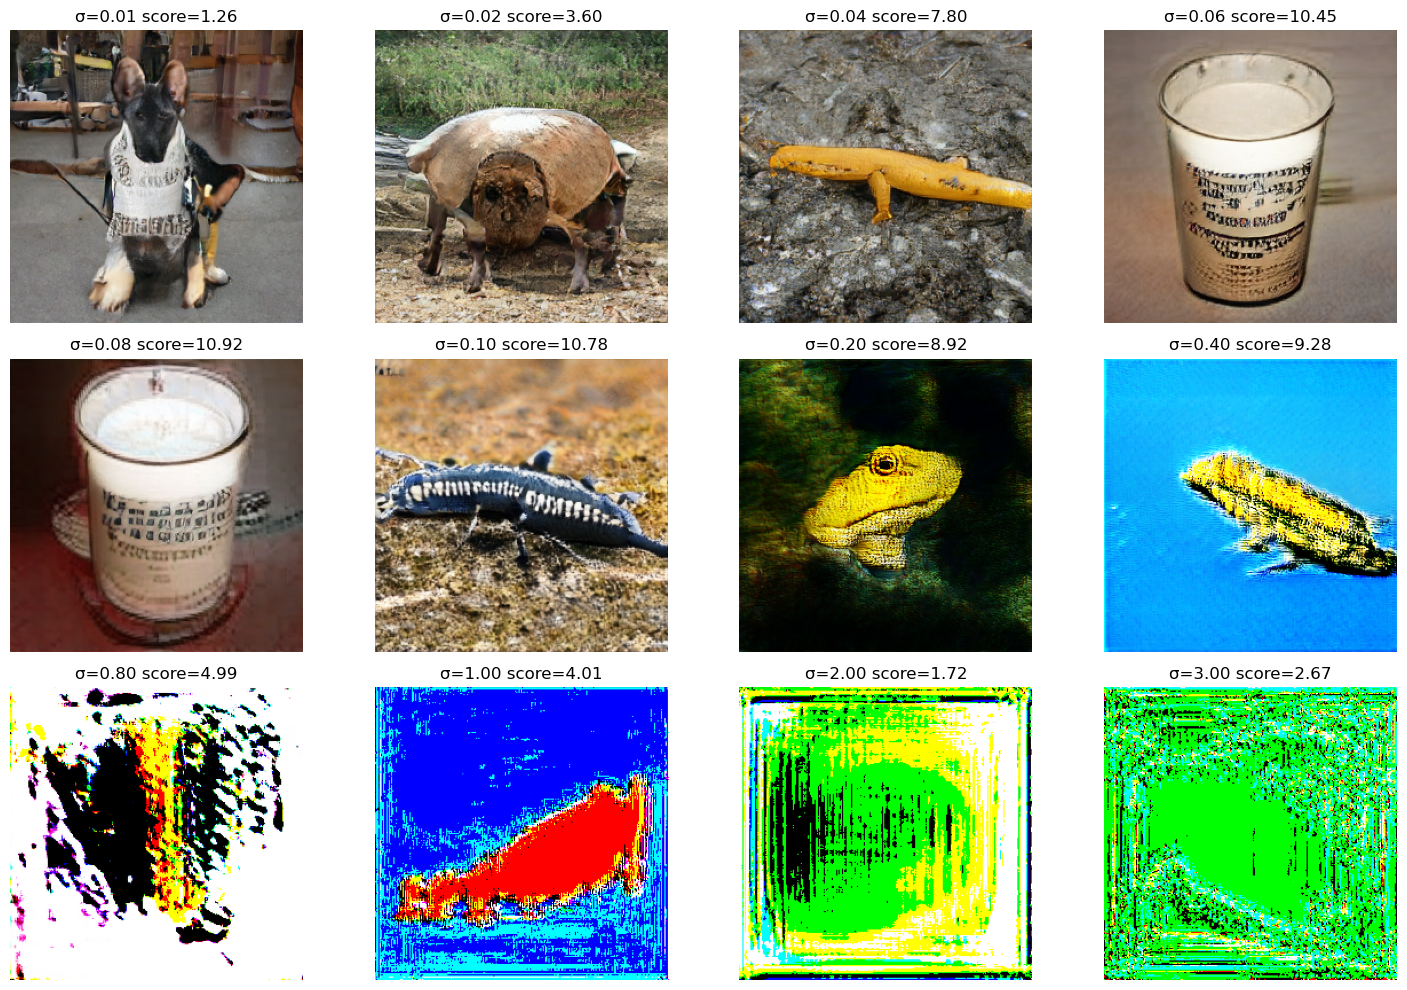

In [63]:
# find best image for one layer and unit and display them
df_subset = df.query("layer == 'layer4' and channel == 1").sort_values(by="sigma", ascending=True)
best_imgs = df_subset.best_img.values

import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 4, figsize=(15, 10))
axes = axes.ravel()

for i, img in enumerate(best_imgs):
    if i < len(axes):
        axes[i].imshow(img.permute(1,2,0).numpy())
        axes[i].axis('off')
        axes[i].set_title(f'σ={df_subset.iloc[i].sigma:.2f} score={df_subset.iloc[i].last_mean_score:.2f}')


plt.tight_layout()
plt.show()

In [ ]:
data['scores'][data['generations']==99]

array([0.48685542, 0.        , 1.3745418 , 0.47616956, 0.25406593,
       0.04545288, 1.9886062 , 1.8160329 , 0.6410893 , 1.3172786 ,
       1.1985734 , 0.57350934, 1.4319276 , 0.5996208 , 0.83228517,
       0.7598896 , 0.6953668 , 1.4959061 , 1.2191145 , 1.71506   ,
       2.154269  , 2.1595976 , 2.0553682 , 0.01042584, 2.2036872 ,
       1.4231188 , 0.28329724, 1.143847  ], dtype=float32)